In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.metrics as skm
import sklearn.datasets as skds
import sklearn.cluster as skcl

In [8]:
iris = skds.load_iris()
data = pd.DataFrame(iris.data, columns = ["x1","x2", "x3", "x4"])
data["target"] = iris.target
data.head()

,x1,x2,x3,x4,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
x = data[["x1", "x4"]]
y = iris.target


,x1,x4
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2
...,...,...
145,6.7,2.3
146,6.3,1.9
147,6.5,2.0
148,6.2,2.3


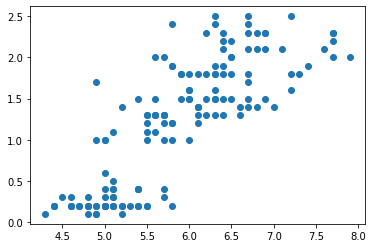

In [12]:
plt.scatter(x.iloc[:,0], x.iloc[:, 1])

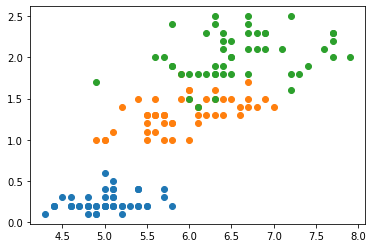

In [14]:
for i in range (max(y)+1):
  plt.scatter(x.iloc[y==i, 0], x.iloc[y==i, 1])

# Kmeans

In [19]:
modelo = skcl.KMeans(n_clusters=3, random_state=0)
yp = modelo.fit_predict(x)

In [22]:
modelo.cluster_centers_

array([[6.84318182, 1.98409091],
       [5.00555556, 0.3037037 ],
       [5.86730769, 1.46538462]])

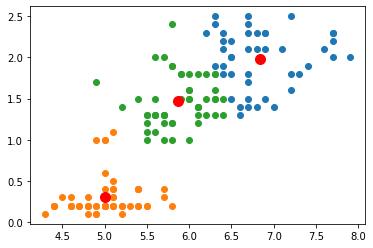

In [32]:
for i in range(modelo.n_clusters):
  plt.scatter(x.iloc[yp==i,0], x.iloc[yp==i,1])
  plt.plot(modelo.cluster_centers_[i][0], modelo.cluster_centers_[i][1], "ro", markersize=10)

In [34]:
skm.silhouette_score(x,yp)

0.5039558227584355

In [38]:
max_sil = -1
k_opt = 0
for k in range (2, 6):
  modelo = skcl.KMeans(n_clusters=k, random_state=0)
  yp = modelo.fit_predict(x)
  if (max_sil<skm.silhouette_score(x,yp)):
    max_sil = skm.silhouette_score(x,yp)
    k_opt = k
print(max_sil)
print(k_opt)

0.5645716498947053
2


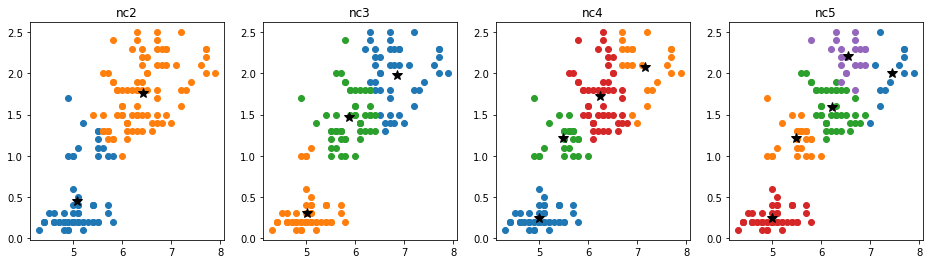

In [50]:
_, axs = plt.subplots(1, 4, figsize=(16,4))
for nc in range(2,6):
  m = skcl.KMeans(nc, random_state=0)
  yp = m.fit_predict(x)
  for i in range(nc):
    axs[nc-2].scatter(x.iloc[yp==i, 0], x.iloc[yp==i, 1])
    axs[nc-2].plot(m.cluster_centers_[i][0], m.cluster_centers_[i][1], "*k", markersize=10)
  axs[nc-2].set_title("nc"+str (nc))

# Agglomerative Clustering

In [54]:
modelo = skcl.AgglomerativeClustering(n_clusters=3)
yp = modelo.fit_predict(x)

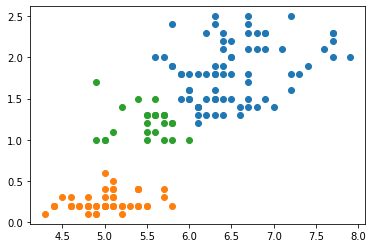

In [55]:
for i in range(modelo.n_clusters):
  plt.scatter(x.iloc[yp==i, 0], x.iloc[yp==i, 1])

In [57]:
skm.silhouette_score(x, yp)

0.45791421106389624

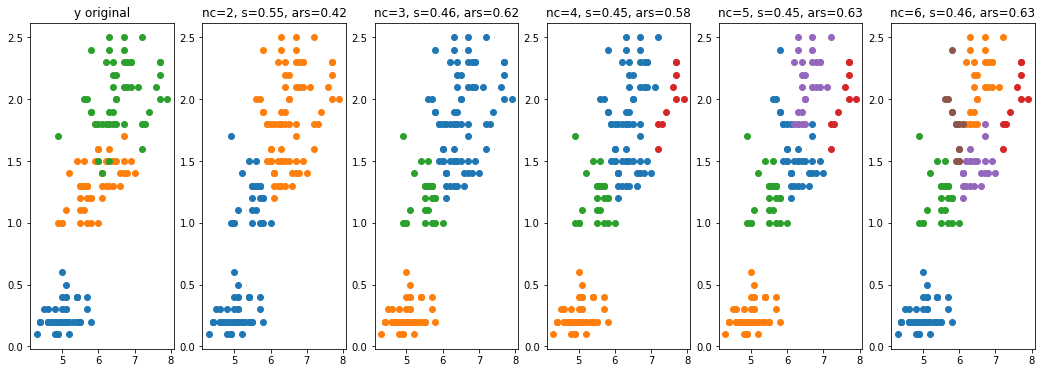

In [62]:
resultados = [y]
titulos = ["y original"]
for nc in range(2, 7):
  m = skcl.AgglomerativeClustering(n_clusters=nc)
  yp = m.fit_predict(x)
  s = skm.silhouette_score(x, yp)
  ars = skm.adjusted_rand_score(y,yp)
  resultados.append(yp)
  titulos.append("nc="+str (nc)+", s={:.2f}, ars={:.2f}".format(s, ars))

_ , axs = plt.subplots(1,6,figsize=(18,6))
for idx in range(len(resultados)):
  yp = resultados[idx]
  
  for i in range(max(yp)+1):
    axs[idx].scatter(x.iloc[yp==i, 0], x.iloc[yp==i, 1])
    axs[idx].set_title(titulos[idx])

# DBSCAN

In [72]:
modelo = skcl.DBSCAN(eps=0.35, metric="euclidean", min_samples=5)
yp = modelo.fit_predict(x)
print(skm.adjusted_rand_score(y,yp))


0.5621364251426576


In [73]:
set(modelo.labels_)

{-1, 0, 1}

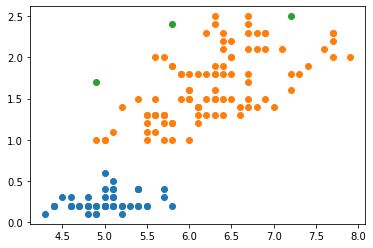

In [74]:
for i in set (modelo.labels_):
  plt.scatter(x.iloc[yp==i, 0], x.iloc[yp==i, 1])

In [78]:
for eps in np.linspace(0.2, 0.4, 10):
  m = skcl.DBSCAN(eps=eps, metric="euclidean", min_samples=5)
  yp = m.fit_predict(x)
  s = skm.silhouette_score(x, yp)
  ars = skm.adjusted_rand_score(y,yp)
  print("eps=", eps, ", nc=", len(set (yp)), ", s=", s, ", ars=",ars)

eps= 0.2 , nc= 7 , s= 0.23503877161873102 , ars= 0.46389852108710466
eps= 0.22222222222222224 , nc= 6 , s= 0.351959071937182 , ars= 0.47592997013767013
eps= 0.24444444444444446 , nc= 5 , s= 0.37609804117565004 , ars= 0.5428341899203423
eps= 0.26666666666666666 , nc= 5 , s= 0.37609804117565004 , ars= 0.5428341899203423
eps= 0.2888888888888889 , nc= 4 , s= 0.4418793554938876 , ars= 0.5393503428978779
eps= 0.3111111111111111 , nc= 4 , s= 0.4378037682199844 , ars= 0.539664593932542
eps= 0.33333333333333337 , nc= 3 , s= 0.4024243743710114 , ars= 0.5621364251426576
eps= 0.35555555555555557 , nc= 3 , s= 0.4024243743710114 , ars= 0.5621364251426576
eps= 0.37777777777777777 , nc= 3 , s= 0.3959224629187117 , ars= 0.5637510205230709
eps= 0.4 , nc= 2 , s= 0.06934701262381705 , ars= 0.00036284338590933585


0.5393503428978779


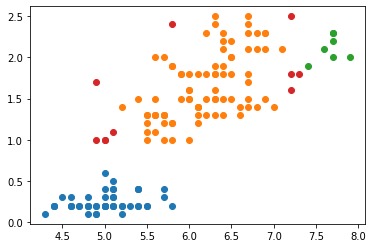

In [81]:
modelo = skcl.DBSCAN(eps=0.28888888, metric="euclidean", min_samples=5)
yp = modelo.fit_predict(x)
print(skm.adjusted_rand_score(y,yp))
for i in set (modelo.labels_):
  plt.scatter(x.iloc[yp==i, 0], x.iloc[yp==i, 1])

usando todos los features

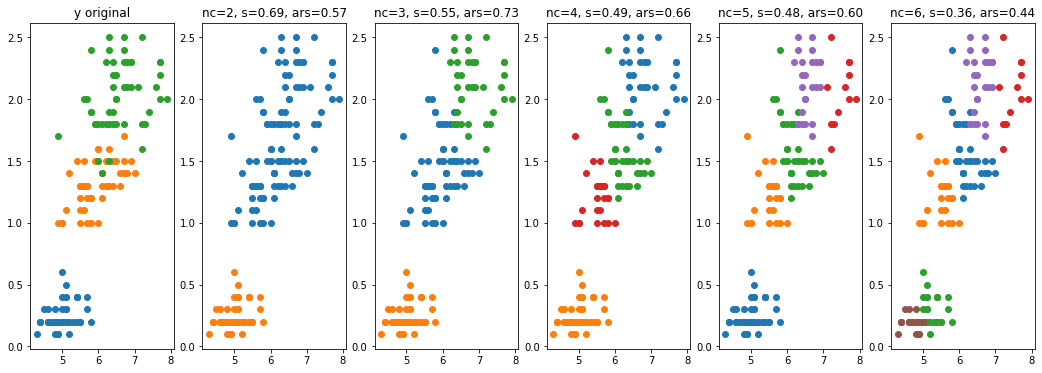

In [82]:
resultados = [y]
titulos = ["y original"]
for nc in range(2, 7):
  m = skcl.AgglomerativeClustering(n_clusters=nc)
  yp = m.fit_predict(iris.data)
  s = skm.silhouette_score(iris.data, yp)
  ars = skm.adjusted_rand_score(y,yp)
  resultados.append(yp)
  titulos.append("nc="+str (nc)+", s={:.2f}, ars={:.2f}".format(s, ars))

_ , axs = plt.subplots(1,6,figsize=(18,6))
for idx in range(len(resultados)):
  yp = resultados[idx]
  
  for i in range(max(yp)+1):
    axs[idx].scatter(x.iloc[yp==i, 0], x.iloc[yp==i, 1])
    axs[idx].set_title(titulos[idx])